<a href="https://colab.research.google.com/github/JWoinski/PRIRLAB9/blob/main/Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

!wget https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 -O cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!apt-key add /var/cuda-repo-9-2-local/7fa2af80.pub
!apt-get update
!apt-get install cuda-9.2

!nvcc --version
!pip install git+git://github.com/andreinechaev/nvcc4jupyter.git



%load_ext nvcc_plugin


In [ ]:
%%cu
#include <stdio.h>
#define N 10000

clock_t start = clock();

void add( int *a, int *b, int *c ) {
int tid = 0; // to jest CPU nr zero, a więc zaczynamy od zera
while (tid < N) {
c[tid] = a[tid] + b[tid];
tid += 1; // mamy tylko jeden CPU, a więc zwiększamy o jeden
}
}
int main( void ) {
int a[N], b[N], c[N];
// zapelnianie tablic a i b za pomocą CPU
for (int i=0; i<N; i++) {
a[i] = -i;
b[i] = i * i;
}
add( a, b, c );
// wyswietlenie wynikow
for (int i=0; i<N; i++) {
printf( "%d + %d = %d\n", a[i], b[i], c[i] );
}

clock_t end = clock();
float seconds = (float)(end - start) / CLOCKS_PER_SEC;

printf("\n %f", seconds);

return 0;


}


Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
-5002 + 25020004 = 25015002
-5003 + 25030009 = 25025006
-5004 + 25040016 = 25035012
-5005 + 25050025 = 25045020
-5006 + 25060036 = 25055030
-5007 + 25070049 = 25065042
-5008 + 25080064 = 25075056
-5009 + 25090081 = 25085072
-5010 + 25100100 = 25095090
-5011 + 25110121 = 25105110
-5012 + 25120144 = 25115132
-5013 + 25130169 = 25125156
-5014 + 25140196 = 25135182
-5015 + 25150225 = 25145210
-5016 + 25160256 = 25155240
-5017 + 25170289 = 25165272
-5018 + 25180324 = 25175306
-5019 + 25190361 = 25185342
-5020 + 25200400 = 25195380
-5021 + 25210441 = 25205420
-5022 + 25220484 = 25215462
-5023 + 25230529 = 25225506
-5024 + 25240576 = 25235552
-5025 + 25250625 = 25245600
-5026 + 25260676 = 25255650
-5027 + 25270729 = 25265702
-5028 + 25280784 = 25275756
-5029 + 25290841 = 25285812
-5030 + 25300900 = 25295870
-5031 + 25310961 = 25305930
-5032 + 25321024 = 25315992
-5033 + 25331089 = 25326056
-5034 + 25341156 = 25336122
-5035 + 253

In [ ]:
%%cu
#include <stdio.h>
#define N 10000

clock_t start = clock();

__global__ void add( int *a, int *b, int *c ) {
int tid = blockIdx.x; // dodawanie na danych znajdujących się pod indeksem
if (tid < N)
c[tid] = a[tid] + b[tid];
}

int main( void ) {
 int a[N], b[N], c[N];
 int *dev_a, *dev_b, *dev_c;
 // alokacja pamięci na GPU
cudaMalloc( (void**)&dev_a, N * sizeof(int) );
cudaMalloc( (void**)&dev_b, N * sizeof(int) );
cudaMalloc( (void**)&dev_c, N * sizeof(int) );
 // zapelnienie tablic a i b na CPU
 for (int i=0; i<N; i++) {
 a[i] = -i;
 b[i] = i * i;
 }
// kopiowanie tablic a i b do GPU
cudaMemcpy( dev_a, a, N * sizeof(int), cudaMemcpyHostToDevice );
cudaMemcpy( dev_b, b, N * sizeof(int), cudaMemcpyHostToDevice );
 add<<<N,1>>>( dev_a, dev_b, dev_c );
 // kopiowanie tablicy c z GPU do CPU
cudaMemcpy( c, dev_c, N * sizeof(int), cudaMemcpyDeviceToHost );
 // wyświetlenie wynikow
 for (int i=0; i<N; i++) {
 printf( "%d + %d = %d\n", a[i], b[i], c[i] );
 }
 // zwolnienie pamieci alokowanej na CPU
 cudaFree( dev_a );
 cudaFree( dev_b );
 cudaFree( dev_c );

clock_t end = clock();
float seconds = (float)(end - start) / CLOCKS_PER_SEC;

printf("\n%f", seconds);

 return 0;
}



Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
-5002 + 25020004 = 25015002
-5003 + 25030009 = 25025006
-5004 + 25040016 = 25035012
-5005 + 25050025 = 25045020
-5006 + 25060036 = 25055030
-5007 + 25070049 = 25065042
-5008 + 25080064 = 25075056
-5009 + 25090081 = 25085072
-5010 + 25100100 = 25095090
-5011 + 25110121 = 25105110
-5012 + 25120144 = 25115132
-5013 + 25130169 = 25125156
-5014 + 25140196 = 25135182
-5015 + 25150225 = 25145210
-5016 + 25160256 = 25155240
-5017 + 25170289 = 25165272
-5018 + 25180324 = 25175306
-5019 + 25190361 = 25185342
-5020 + 25200400 = 25195380
-5021 + 25210441 = 25205420
-5022 + 25220484 = 25215462
-5023 + 25230529 = 25225506
-5024 + 25240576 = 25235552
-5025 + 25250625 = 25245600
-5026 + 25260676 = 25255650
-5027 + 25270729 = 25265702
-5028 + 25280784 = 25275756
-5029 + 25290841 = 25285812
-5030 + 25300900 = 25295870
-5031 + 25310961 = 25305930
-5032 + 25321024 = 25315992
-5033 + 25331089 = 25326056
-5034 + 25341156 = 25336122
-5035 + 253

In [ ]:
def julia(x, y, max_iters):
  i = 0
  c = complex(-0.8, 0.156)
  a = complex(x,y)
  for i in range(max_iters):
    a = a*a + c
    if (a.real*a.real + a.imag*a.imag) > 1000:
      return int((i/max_iters)*255)
  return 255

  

In [ ]:
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
  height = image.shape[0]
  width = image.shape[1]

  pixel_size_x = (max_x - min_x) / width
  pixel_size_y = (max_y - min_y) / height
  for x in range(width):
    real = min_x + x * pixel_size_x
    for y in range(height):
      imag = min_y + y * pixel_size_y
      color = julia(real, imag, iters)
      image[y, x] = color

  return image

1 loop, best of 5: 3.61 s per loop


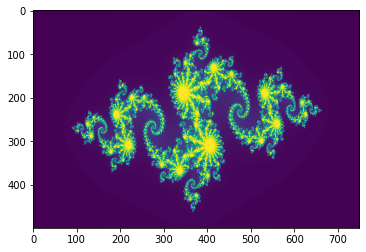

In [ ]:
image = np.zeros((500, 750), dtype=np.uint8)
%timeit create_fractal(-2.0, 2.0, -1.0, 1.0, image, 200)
plt.imshow(image)
plt.viridis()
plt.show()

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math
from numba import jit, njit, vectorize, cuda

In [ ]:
!find / -iname 'libdevice'
!find / -iname 'libnvvm.so'

find: ‘/proc/33/task/33/net’: Invalid argument
find: ‘/proc/33/net’: Invalid argument
/usr/local/lib/python3.7/dist-packages/jaxlib/cuda/nvvm/libdevice
/usr/local/cuda-9.2/nvvm/libdevice
find: ‘/proc/33/task/33/net’: Invalid argument
find: ‘/proc/33/net’: Invalid argument
/usr/local/cuda-9.2/nvvm/lib64/libnvvm.so


In [ ]:
import os
os.environ['NUMBAPRO_LIBDEVICE'] = "/usr/local/cuda-10.0/nvvm/libdevice"
os.environ['NUMBAPRO_NVVM'] = "/usr/local/cuda-10.0/nvvm/lib64/libnvvm.so"

In [ ]:
@vectorize(['int64(int64, int64)'], target='cuda')
def add_ufunc_gpu(x, y):
    return x + y

In [ ]:
x = np.arange(10)
y = 2 * x

In [ ]:
add_ufunc_gpu(x, y)

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27])

In [ ]:
%timeit add_ufunc_gpu(x, y)

1000 loops, best of 5: 1.77 ms per loop


In [ ]:
@vectorize(['int64(int64, int64)'], target='cpu')
def add_ufunc_cpu(x, y):
    return x + y
%timeit add_ufunc_cpu(x, y)


The slowest run took 23.39 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 586 ns per loop


In [ ]:
@cuda.jit
def add_kernel(x, y, out):
    tidx = cuda.threadIdx.x # this is the unique thread ID within a 1D block
    bidx = cuda.blockIdx.x  # Similarly, this is the unique block ID within the 1D grid

    block_dimx = cuda.blockDim.x  # number of threads per block
    grid_dimx = cuda.gridDim.x    # number of blocks in the grid
    
    start = tidx + bidx * block_dimx
    stride = block_dimx * grid_dimx

    # assuming x and y inputs are same length
    for i in range(start, x.shape[0], stride):
        out[i] = x[i] + y[i]

In [ ]:
n = 100000
x = np.arange(n).astype(np.float32)
y = 2 * x
out = np.empty_like(x)

threads_per_block = 128
blocks_per_grid = 30

add_kernel[blocks_per_grid, threads_per_block](x, y, out)
print(out[:10])

[ 0.  3.  6.  9. 12. 15. 18. 21. 24. 27.]


In [ ]:
@cuda.jit
def add_kernel(x, y, out):
    start = cuda.grid(1)      # the 1 argument means a one dimensional thread grid, this returns a single value
    stride = cuda.gridsize(1) # ditto

    # assuming x and y inputs are same length
    for i in range(start, x.shape[0], stride):
        out[i] = x[i] + y[i]

In [ ]:
x_device = cuda.to_device(x)
y_device = cuda.to_device(y)

print(x_device)
print(x_device.shape)
print(x_device.dtype)

(100000,)
float32


In [ ]:
out_device = cuda.device_array(shape=(n,), dtype=np.float32)  # does not initialize the contents, much like np.empty()

In [ ]:
%timeit add_kernel[blocks_per_grid, threads_per_block](x_device, y_device, out_device)

The slowest run took 753.68 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 273 µs per loop


In [ ]:
%timeit add_kernel[blocks_per_grid, threads_per_block](x, y, out)

100 loops, best of 5: 3.05 ms per loop


In [ ]:
out = out_device.copy_to_host()

In [ ]:
%timeit x + y

The slowest run took 28.13 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 77.6 µs per loop


In [ ]:
n = 1000000
x = np.arange(n).astype(np.float32)
y = 2 * x

In [ ]:
x_device = cuda.to_device(x)
y_device = cuda.to_device(y)
out_device = cuda.device_array(shape=(n,), dtype=np.float32)

In [ ]:
%timeit add_kernel[blocks_per_grid, threads_per_block](x_device, y_device, out_device)

1000 loops, best of 5: 285 µs per loop


In [ ]:
%timeit x + y

The slowest run took 6.38 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 746 µs per loop


GPU IMPELEMENTACJA

In [ ]:
@cuda.jit(device=True)
def julia(x, y, max_iters):
  """
  Given the real and imaginary parts of a complex number,
  determine if it is a candidate for membership in the Julia
  set given a fixed number of iterations.
  """
  i = 0
  c = complex(-0.8, 0.156)
  a = complex(x,y)
  for i in range(max_iters):
    a = a*a + c
    if (a.real*a.real + a.imag*a.imag) > 1000:
      return int((i/max_iters)*255)
  return 255

In [ ]:
threadsperblock = 16
xblocks = (image.shape[1] + (threadsperblock - 1)) // threadsperblock
yblocks = (image.shape[0] + (threadsperblock - 1)) // threadsperblock

In [ ]:
@cuda.jit
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
  height = image.shape[0]
  width = image.shape[1]

  pixel_size_x = (max_x - min_x) / width
  pixel_size_y = (max_y - min_y) / height
    
  x, y = cuda.grid(2)
    
  if x < width and y < height:
    real = min_x + x * pixel_size_x
    imag = min_y + y * pixel_size_y
    color = julia(real, imag, iters)
    image[y, x] = color

In [ ]:
image = np.zeros((500, 750), dtype=np.uint8)
threadsperblock = 16
threads_per_block = (16, 16)
xblocks = (image.shape[1] + (threadsperblock - 1)) // threadsperblock
yblocks = (image.shape[0] + (threadsperblock - 1)) // threadsperblock
blocks_per_grid = (xblocks, yblocks)

The slowest run took 164.23 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 1.73 ms per loop


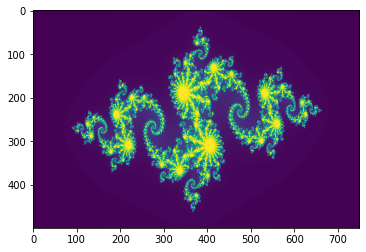

In [ ]:
%timeit create_fractal[blocks_per_grid, threads_per_block](-2.0, 2.0, -1.0, 1.0, image, 200)
plt.imshow(image)
plt.viridis()
plt.show()